In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c815bcd4deb3ea067b2984b951f15bfc


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachnyy
Processing Record 2 of Set 1 | shingu
Processing Record 3 of Set 1 | barawe
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | moussoro
Processing Record 8 of Set 1 | kyren
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | elizabeth city
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | straumen
Processing Record 14 of Set 1 | kovernino
Processing Record 15 of Set 1 | okhotsk
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | morro bay
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | pontianak
Processing Record 20 of Set 1 | sokolo
Processing Record 21 of Set 1 | broken hill
Processing Record 22 of Set 1 | yellowknife
Processing Record 23

Processing Record 37 of Set 4 | nago
Processing Record 38 of Set 4 | vila velha
Processing Record 39 of Set 4 | dingle
Processing Record 40 of Set 4 | morehead
Processing Record 41 of Set 4 | ballina
Processing Record 42 of Set 4 | banjar
Processing Record 43 of Set 4 | suntar
Processing Record 44 of Set 4 | gamba
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | mahmudabad
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | oksfjord
Processing Record 49 of Set 4 | dongsheng
Processing Record 50 of Set 4 | tilichiki
Processing Record 1 of Set 5 | jiexiu
Processing Record 2 of Set 5 | san cristobal
Processing Record 3 of Set 5 | salaverry
Processing Record 4 of Set 5 | paz de ariporo
City not found. Skipping...
Processing Record 5 of Set 5 | karamken
City not found. Skipping...
Processing Record 6 of Set 5 | onguday
Processing Record 7 of Set 5 | fonte boa
Processing Record 8 of Set 5 | altay
Processing Record 9 of Set 5 | queimados
P

Processing Record 26 of Set 8 | volzhsk
Processing Record 27 of Set 8 | mecca
Processing Record 28 of Set 8 | asyut
Processing Record 29 of Set 8 | male
Processing Record 30 of Set 8 | onega
Processing Record 31 of Set 8 | bushehr
Processing Record 32 of Set 8 | creel
Processing Record 33 of Set 8 | kirovskiy
Processing Record 34 of Set 8 | khuzhir
Processing Record 35 of Set 8 | plettenberg bay
Processing Record 36 of Set 8 | eureka
Processing Record 37 of Set 8 | zhangye
Processing Record 38 of Set 8 | pozo colorado
Processing Record 39 of Set 8 | palu
Processing Record 40 of Set 8 | poum
Processing Record 41 of Set 8 | broome
Processing Record 42 of Set 8 | mo i rana
Processing Record 43 of Set 8 | palembang
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 46 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 47 of Set 8 | kikwit
Processing Record 48 of Set 8 | acapulco
Proce

Processing Record 11 of Set 12 | sayyan
Processing Record 12 of Set 12 | castle douglas
Processing Record 13 of Set 12 | baiersbronn
Processing Record 14 of Set 12 | barmer
Processing Record 15 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 16 of Set 12 | port keats
Processing Record 17 of Set 12 | wewak
Processing Record 18 of Set 12 | lisakovsk
Processing Record 19 of Set 12 | iracoubo
Processing Record 20 of Set 12 | krasnyy chikoy
Processing Record 21 of Set 12 | belogorsk
Processing Record 22 of Set 12 | valdivia
Processing Record 23 of Set 12 | svetlaya
Processing Record 24 of Set 12 | serafimovskiy
Processing Record 25 of Set 12 | kidal
Processing Record 26 of Set 12 | diofior
Processing Record 27 of Set 12 | koppies
Processing Record 28 of Set 12 | brookhaven
Processing Record 29 of Set 12 | areka
Processing Record 30 of Set 12 | mount pleasant
Processing Record 31 of Set 12 | pishin
Processing Record 32 of Set 12 | preobrazheniye
Processing Record 33 of S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Udachnyy,66.4167,112.4000,-4.77,100,94,2.04,RU,2021-04-20 20:19:16
1,Shingu,33.7333,135.9833,53.67,64,52,6.35,JP,2021-04-20 20:19:16
2,Ushuaia,-54.8000,-68.3000,50.00,57,0,4.97,AR,2021-04-20 20:19:16
3,Mataura,-46.1927,168.8643,51.01,83,8,4.00,NZ,2021-04-20 20:19:17
4,Saskylakh,71.9167,114.0833,-18.02,100,85,2.19,RU,2021-04-20 20:18:46
5,Moussoro,13.6408,16.4901,90.82,6,0,11.95,TD,2021-04-20 20:19:17
6,Kyren,51.6828,102.1408,26.42,93,100,5.28,RU,2021-04-20 20:19:17
7,Kapaa,22.0752,-159.3190,77.00,78,75,6.91,US,2021-04-20 20:18:05
8,Elizabeth City,36.2946,-76.2511,73.99,43,1,12.66,US,2021-04-20 20:19:18
9,Ostrovnoy,68.0531,39.5131,35.06,69,0,22.64,RU,2021-04-20 20:19:18


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1618950127.968055

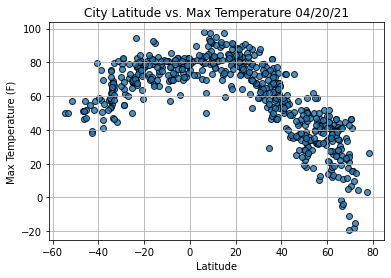

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

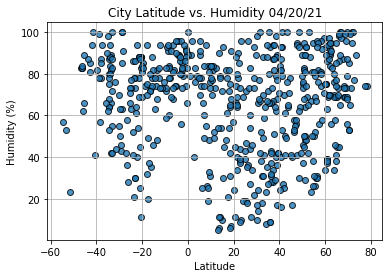

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


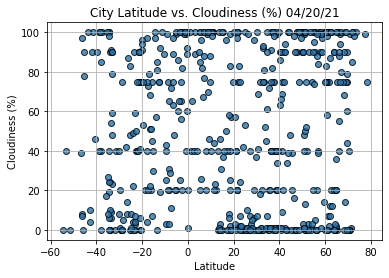

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

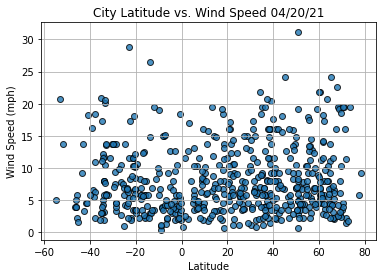

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()